In [1]:
import numpy as np

# Load data
X = np.load(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\dataset\Images64Edited5V2.npy")
y = np.load(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\dataset\Labels64Edited5V2.npy")
categories = np.load(
    r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\dataset\CategoryNamesEdited5V2.npy",
    allow_pickle=True
)

print("Images shape:", X.shape)
print("Labels shape:", y.shape)
print("Categories:", categories)


Images shape: (1479, 64, 64, 3)
Labels shape: (1479, 5)
Categories: ['eggs' 'strawberries' 'carrot' 'apples' 'celery ']


In [2]:
X = X / 255.0

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')   # 5 categories
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test))


Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.3101 - loss: 1.7577 - val_accuracy: 0.5236 - val_loss: 1.1421
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6159 - loss: 1.0328 - val_accuracy: 0.7264 - val_loss: 0.7292
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6801 - loss: 0.8229 - val_accuracy: 0.7264 - val_loss: 0.7006
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7235 - loss: 0.7357 - val_accuracy: 0.7635 - val_loss: 0.6253
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7623 - loss: 0.6604 - val_accuracy: 0.8007 - val_loss: 0.5808
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7935 - loss: 0.5768 - val_accuracy: 0.8176 - val_loss: 0.5708
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8202 - loss: 0.5232 - val_accuracy: 0.8074 - val_loss: 0.5591
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8337 - loss: 0.4784 - val_accuracy: 0.8108 - v

In [6]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8078 - loss: 0.7823
Test Accuracy: 0.8243243098258972


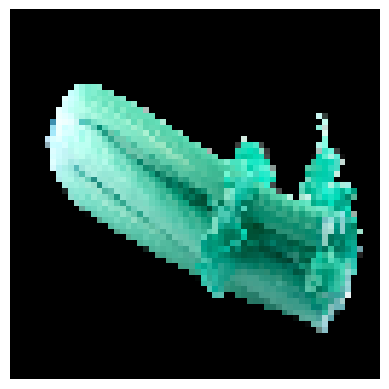

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Predicted: celery 
Actual: celery 


In [7]:
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.randint(0, len(X_test))
img = X_test[idx]

plt.imshow(img)
plt.axis("off")
plt.show()

pred = model.predict(img.reshape(1,64,64,3))
print("Predicted:", categories[np.argmax(pred)])
print("Actual:", categories[np.argmax(y_test[idx])])


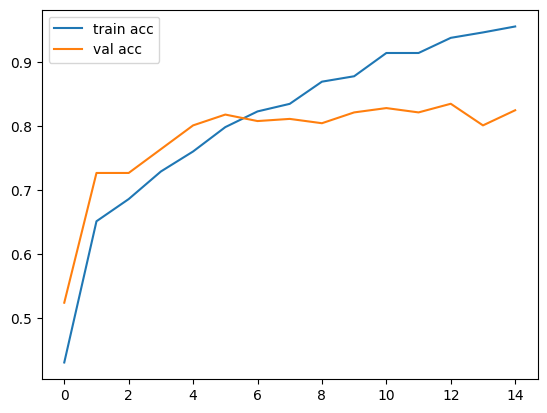

In [8]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [9]:
import tensorflow as tf
import numpy as np

# Assuming 'model' is your trained model and 'categories' is your list of class names
model.save(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\streamlittt\my_model.keras")

# Save class names separately
categories = ['eggs', 'strawberries', 'carrot', 'apples', 'celery']
np.save(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\streamlittt\class_names.npy", categories)

print("✅ Model and class names saved!")


✅ Model and class names saved!


In [26]:
import tensorflow as tf
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox, Toplevel, scrolledtext
from PIL import Image, ImageTk

# Load model and class names
model = tf.keras.models.load_model(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\streamlittt\my_model.keras")
categories = np.load(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\streamlittt\class_names.npy", allow_pickle=True)

# Set modern color scheme
BG_COLOR = "#fff5e6"  # Soft peach
ACCENT_COLOR = "#ff7f50"  # Coral
BUTTON_COLOR = "#ffaa66"  # Light orange
TEXT_COLOR = "#333333"  # Dark gray
HIGHLIGHT_COLOR = "#ff6b6b"  # Coral red

# Recipe database
recipes = {
    "pizza": {
        "title": "🍕 Homemade Pizza Recipe",
        "ingredients": [
            "2 ½ cups all-purpose flour",
            "1 teaspoon sugar",
            "1 teaspoon salt",
            "1 tablespoon olive oil",
            "1 cup warm water",
            "2 ¼ teaspoons active dry yeast",
            "½ cup pizza sauce",
            "2 cups shredded mozzarella cheese",
            "Your favorite toppings (pepperoni, mushrooms, peppers, etc.)"
        ],
        "instructions": [
            "1. Prepare the dough by mixing flour, sugar, salt, yeast, olive oil, and warm water.",
            "2. Knead the dough for 5-7 minutes until smooth and elastic.",
            "3. Let the dough rise in a greased bowl for 1 hour.",
            "4. Preheat oven to 475°F (245°C).",
            "5. Roll out the dough on a floured surface.",
            "6. Transfer to a pizza pan or baking sheet.",
            "7. Spread pizza sauce, add cheese and toppings.",
            "8. Bake for 12-15 minutes until crust is golden and cheese is bubbly."
        ]
    },
    "burger": {
        "title": "🍔 Classic Burger Recipe",
        "ingredients": [
            "1 lb ground beef (80% lean)",
            "1 teaspoon Worcestershire sauce",
            "1 teaspoon garlic powder",
            "1 teaspoon onion powder",
            "Salt and pepper to taste",
            "4 burger buns",
            "Lettuce, tomato, onion for serving",
            "Cheese slices (optional)",
            "Condiments of your choice"
        ],
        "instructions": [
            "1. In a bowl, mix ground beef with Worcestershire sauce, garlic powder, onion powder, salt, and pepper.",
            "2. Form into 4 equal-sized patties, slightly larger than your buns.",
            "3. Make a slight indentation in the center of each patty to prevent bulging during cooking.",
            "4. Heat grill or skillet to medium-high heat.",
            "5. Cook patties for 4-5 minutes per side for medium doneness.",
            "6. Add cheese slices in the last minute of cooking if desired.",
            "7. Toast the buns lightly.",
            "8. Assemble burgers with your favorite toppings and condiments."
        ]
    },
    "sushi": {
        "title": "🍣 California Roll Recipe",
        "ingredients": [
            "2 cups sushi rice",
            "2 ¼ cups water",
            "¼ cup rice vinegar",
            "2 tablespoons sugar",
            "1 teaspoon salt",
            "5 sheets nori (seaweed)",
            "1 avocado, sliced",
            "1 cucumber, julienned",
            "8 imitation crab sticks, shredded",
            "Soy sauce, pickled ginger, and wasabi for serving"
        ],
        "instructions": [
            "1. Rinse rice until water runs clear. Cook with water according to package instructions.",
            "2. Mix rice vinegar, sugar, and salt. Fold into cooked rice and let cool.",
            "3. Place nori sheet on bamboo mat shiny side down.",
            "4. Spread a thin layer of rice over nori, leaving 1-inch border at top.",
            "5. Arrange avocado, cucumber, and crab sticks in a line along the bottom.",
            "6. Roll tightly using the bamboo mat, pressing gently as you go.",
            "7. Slice roll into 8 pieces with a sharp wet knife.",
            "8. Serve with soy sauce, pickled ginger, and wasabi."
        ]
    },
    "pasta": {
        "title": "🍝 Creamy Fettuccine Alfredo",
        "ingredients": [
            "8 oz fettuccine pasta",
            "½ cup unsalted butter",
            "1 cup heavy cream",
            "1 clove garlic, minced",
            "1 ½ cups grated Parmesan cheese",
            "¼ teaspoon salt",
            "⅛ teaspoon pepper",
            "2 tablespoons fresh parsley, chopped"
        ],
        "instructions": [
            "1. Cook pasta according to package directions until al dente.",
            "2. Meanwhile, melt butter in a saucepan over medium heat.",
            "3. Add garlic and cook for 1 minute until fragrant.",
            "4. Add cream and simmer for 5 minutes, stirring occasionally.",
            "5. Gradually whisk in Parmesan cheese until smooth.",
            "6. Season with salt and pepper.",
            "7. Drain pasta and toss with sauce until well coated.",
            "8. Garnish with fresh parsley and serve immediately."
        ]
    },
    "salad": {
        "title": "🥗 Fresh Garden Salad",
        "ingredients": [
            "4 cups mixed greens (lettuce, spinach, arugula)",
            "1 cucumber, sliced",
            "2 tomatoes, chopped",
            "1 bell pepper, sliced",
            "½ red onion, thinly sliced",
            "½ cup croutons",
            "¼ cup grated Parmesan cheese",
            "Your favorite salad dressing"
        ],
        "instructions": [
            "1. Wash and dry all vegetables thoroughly.",
            "2. Chop lettuce and other greens into bite-sized pieces.",
            "3. Slice cucumber, tomatoes, and bell pepper.",
            "4. Thinly slice red onion.",
            "5. Combine all vegetables in a large bowl.",
            "6. Add croutons and Parmesan cheese.",
            "7. Toss with your favorite dressing just before serving.",
            "8. Enjoy immediately for the freshest taste."
        ]
    },
    "ice cream": {
        "title": "🍦 Homemade Vanilla Ice Cream",
        "ingredients": [
            "2 cups heavy cream",
            "1 cup whole milk",
            "¾ cup granulated sugar",
            "1 tablespoon vanilla extract",
            "Pinch of salt",
            "6 large egg yolks"
        ],
        "instructions": [
            "1. In a saucepan, heat cream, milk, and half the sugar until steaming.",
            "2. Whisk egg yolks with remaining sugar until pale yellow.",
            "3. Slowly temper eggs by adding hot cream mixture while whisking constantly.",
            "4. Return mixture to saucepan and cook over low heat until it coats the back of a spoon.",
            "5. Strain through a fine-mesh sieve and stir in vanilla and salt.",
            "6. Chill completely in refrigerator (at least 4 hours or overnight).",
            "7. Churn in ice cream maker according to manufacturer's instructions.",
            "8. Freeze for at least 4 hours before serving."
        ]
    },
    "default": {
        "title": "🍽️ Delicious Recipe Ideas",
        "ingredients": [
            "Fresh ingredients based on your food preference",
            "Herbs and spices to enhance flavor",
            "Quality proteins and vegetables",
            "Your favorite cooking oil or butter"
        ],
        "instructions": [
            "1. Start with fresh, high-quality ingredients",
            "2. Prepare your ingredients before cooking (mise en place)",
            "3. Season generously but taste as you go",
            "4. Cook with patience and attention",
            "5. Plate your dish attractively",
            "6. Enjoy your homemade meal!"
        ]
    }
}

# Function to select image and predict
def select_and_predict():
    image_path = filedialog.askopenfilename(
        title="📸 Select a Food Image 🍕",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp")]
    )
    if not image_path:
        return  # user cancelled

    try:
        # Display image in GUI
        img = Image.open(image_path)
        img_display = img.resize((250, 250))  # Resize for display
        img_tk = ImageTk.PhotoImage(img_display)
        image_label.config(image=img_tk)
        image_label.image = img_tk

        # Preprocess for model
        img_array = img.resize((64, 64))  # Resize to model input
        img_array = np.array(img_array) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        predicted_class_idx = np.argmax(prediction)
        predicted_class = categories[predicted_class_idx]
        confidence = prediction[0][predicted_class_idx] * 100
        
        # Show result with emojis based on food type
        emoji = get_food_emoji(predicted_class)
        result_label.config(
            text=f"{emoji} Predicted: {predicted_class} {emoji}\n"
                 f"🎯 Confidence: {confidence:.2f}%",
            fg=HIGHLIGHT_COLOR,
            font=("Arial", 14, "bold")
        )
        
        # Enable recipe button
        recipe_btn.config(state=tk.NORMAL, command=lambda: show_recipe(predicted_class))

    except Exception as e:
        messagebox.showerror("❌ Error", f"Error processing image: {e}")

def get_food_emoji(food_name):
    # Map food categories to emojis
    emoji_map = {
        'pizza': '🍕',
        'burger': '🍔',
        'sushi': '🍣',
        'pasta': '🍝',
        'salad': '🥗',
        'ice_cream': '🍦',
        'cake': '🍰',
        'bread': '🍞',
        'steak': '🥩',
        'chicken': '🍗',
        'fish': '🐟',
        'rice': '🍚',
        'soup': '🍲',
        'taco': '🌮',
        'donut': '🍩'
    }
    
    # Check for matches (case insensitive)
    for key, emoji in emoji_map.items():
        if key.lower() in food_name.lower():
            return emoji
    
    # Default food emoji
    return '🍽️'

def show_recipe(food_type):
    # Create new window for recipe
    recipe_window = Toplevel(root)
    recipe_window.title("🍳 Recipe Suggestions")
    recipe_window.geometry("600x700")
    recipe_window.configure(bg="#fff9e6")
    
    # Get recipe based on food type or use default
    recipe = recipes.get(food_type.lower(), recipes["default"])
    
    # Title
    title_label = tk.Label(
        recipe_window, 
        text=recipe["title"], 
        font=("Arial", 18, "bold"), 
        fg=ACCENT_COLOR,
        bg="#fff9e6",
        pady=10
    )
    title_label.pack()
    
    # Ingredients frame
    ingredients_frame = tk.LabelFrame(
        recipe_window, 
        text="📝 Ingredients", 
        font=("Arial", 14, "bold"),
        fg=TEXT_COLOR,
        bg="#fff9e6",
        padx=10,
        pady=10
    )
    ingredients_frame.pack(fill="x", padx=20, pady=10)
    
    for ingredient in recipe["ingredients"]:
        ingredient_label = tk.Label(
            ingredients_frame, 
            text=f"• {ingredient}", 
            font=("Arial", 11),
            fg=TEXT_COLOR,
            bg="#fff9e6",
            anchor="w"
        )
        ingredient_label.pack(fill="x", pady=2)
    
    # Instructions frame
    instructions_frame = tk.LabelFrame(
        recipe_window, 
        text="👩‍🍳 Instructions", 
        font=("Arial", 14, "bold"),
        fg=TEXT_COLOR,
        bg="#fff9e6",
        padx=10,
        pady=10
    )
    instructions_frame.pack(fill="both", expand=True, padx=20, pady=10)
    
    instructions_text = scrolledtext.ScrolledText(
        instructions_frame,
        font=("Arial", 11),
        fg=TEXT_COLOR,
        bg="#fffdf6",
        padx=10,
        pady=10,
        wrap=tk.WORD,
        height=10
    )
    instructions_text.pack(fill="both", expand=True, padx=5, pady=5)
    
    for instruction in recipe["instructions"]:
        instructions_text.insert(tk.END, f"{instruction}\n\n")
    instructions_text.config(state=tk.DISABLED)
    
    # Close button
    close_btn = tk.Button(
        recipe_window,
        text="Close Recipe",
        command=recipe_window.destroy,
        bg=HIGHLIGHT_COLOR,
        fg="white",
        font=("Arial", 12),
        relief=tk.FLAT,
        cursor="hand2",
        pady=5
    )
    close_btn.pack(pady=10)

# Tkinter GUI setup with modern styling
root = tk.Tk()
root.title("🍕 FoodVision Classifier 🍔")
root.geometry("550x700")
root.configure(bg=BG_COLOR)

# Set application icon (if available)
try:
    root.iconbitmap(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\DL_NLP\Project\streamlittt\food_icon.ico")
except:
    pass  # Continue without custom icon if not available

# Header
header = tk.Label(
    root, 
    text="🍕 FoodVision Classifier 🍔", 
    font=("Arial", 20, "bold"), 
    fg=ACCENT_COLOR,
    bg=BG_COLOR,
    pady=10
)
header.pack()

# Instructions
instructions = tk.Label(
    root,
    text="Upload an image of food to classify it and get recipe suggestions!",
    font=("Arial", 12),
    fg=TEXT_COLOR,
    bg=BG_COLOR,
    pady=5,
    wraplength=400
)
instructions.pack()

# Button with styling
btn = tk.Button(
    root, 
    text="📸 Select Food Image & Predict 🍕", 
    command=select_and_predict, 
    width=30, 
    height=2,
    bg=BUTTON_COLOR,
    fg="white",
    font=("Arial", 12, "bold"),
    relief=tk.FLAT,
    cursor="hand2"
)
btn.pack(pady=15)

# Image display
image_label = tk.Label(root, bg=BG_COLOR)
image_label.pack(pady=10)

# Result label
result_label = tk.Label(
    root, 
    text="", 
    font=("Arial", 14, "bold"),
    bg=BG_COLOR,
    pady=10
)
result_label.pack()

# Recipe button (initially disabled)
recipe_btn = tk.Button(
    root, 
    text="📖 Get Recipe Suggestions", 
    state=tk.DISABLED,
    width=25, 
    height=2,
    bg=ACCENT_COLOR,
    fg="white",
    font=("Arial", 12, "bold"),
    relief=tk.FLAT,
    cursor="hand2"
)
recipe_btn.pack(pady=10)

# Footer
footer = tk.Label(
    root,
    text="Powered by TensorFlow & Tkinter 🚀",
    font=("Arial", 10),
    fg=TEXT_COLOR,
    bg=BG_COLOR,
    pady=10
)
footer.pack(side=tk.BOTTOM)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
